# ML Stock Price Prediction Project (Tesla)

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs,init_notebook_mode ,plot,iplot
init_notebook_mode(connected=True)

In [95]:
Tesla=pd.read_csv("tesla.csv")
Tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [116]:
Tesla_=pd.read_csv("tesla.csv",index_col="Date")
Tesla_.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [96]:
Tesla.shape

(2193, 7)

In [97]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [98]:
Tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [99]:
Tesla["Date"]=pd.to_datetime(Tesla["Date"])

C:\Users\user\AppData\Local\Temp\ipykernel_12368\3979409736.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



<AxesSubplot: >

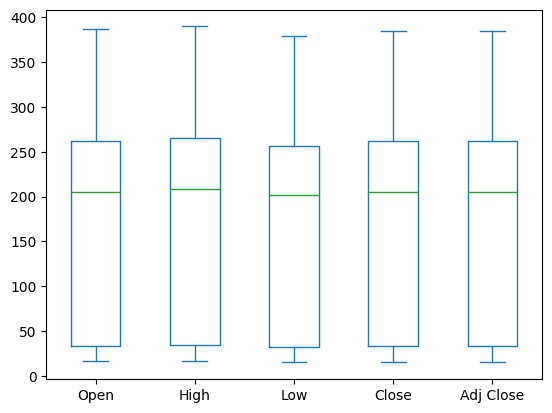

In [100]:
Tesla[["Open","High","Low","Close","Adj Close"]].plot(kind="box")

## Plotting a graph to show the stock variation 

In [101]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

Tesla_data = [{'x':Tesla['Date'], 'y':Tesla['Close']}]
plot = go.Figure(data=Tesla_data, layout=layout)

<AxesSubplot: xlabel='Date'>

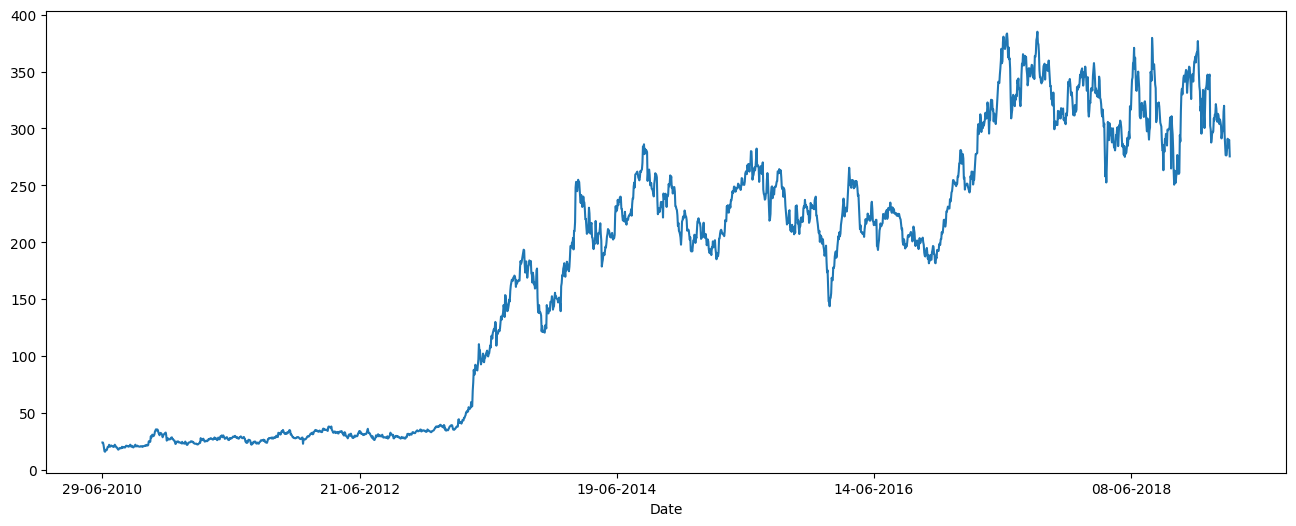

In [118]:
Tesla_["Close"].plot(figsize=(16,6))

In [104]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [105]:
X=np.array(Tesla.index).reshape(-1,1)
y=Tesla["Close"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [106]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [107]:
lm.score(X_test,y_test)

0.8610649253244574

In [108]:
y_predicted=lm.predict(X_test)

In [109]:
y_predicted_on_train=lm.predict(X_train)

In [110]:
score_mse=mean_squared_error(y_test,y_predicted)
score_mse

1780.987539418845

In [111]:
r2=r2_score(y_test,y_predicted)
r2

0.8610649253244574

In [112]:
score_mse_=mean_squared_error(y_train,y_predicted_on_train)
score_mse_

1821.3833862936174

In [113]:
r2_=r2_score(y_train,y_predicted_on_train)
r2_

0.8658871776828707